Name: Sunayana Samavedam 


Roll Number: 2023702013

https://github.com/sunayana-981/sem2/tree/main/CV/assignments/assigment0

1. Installing OpenCV

The first step of doing this assignment is to install the OpenCV package on your computer. OpenCV is an open source library for developing computer vision applications. Please see: http://opencv.org for details of both installation and usage of the library. OpenCV has Linux, Windows and Mac versions available. Note that the compilation of the library from the sources would take a few hours. Make sure you installed the required libraries before compiling and installing OpenCV. Test your installation with a basic program to read write and modify an image. In linux, opencv is readily available through the built in software installation utilities.
The primary goal of the assignment is the learning you get from writing the code and experimenting with various factors. So do write a detailed account of the various experiments and your learnings in your report.

Report:

The problem included installing OpenCV library and testing for proper installation by running a simple program to read, modify and write image. There were no problems faced in the execution of this problem. I experimented with various image formats and different image modifications to test the variety that OpenCV offers.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

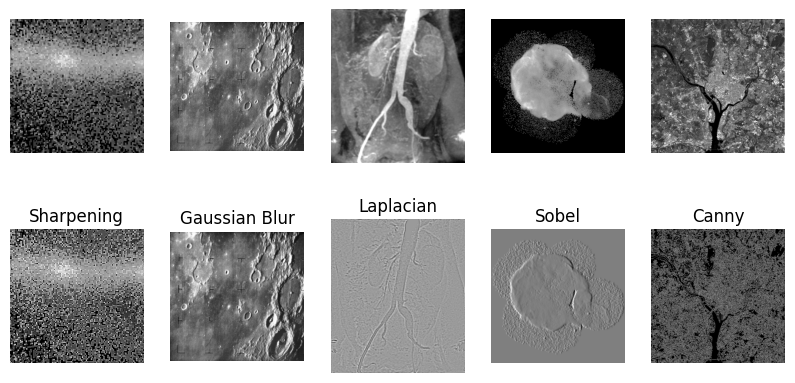

In [3]:

#write the above code in one line using list comprehension
images = [cv2.imread(f"data/fig{i}.tif", cv2.IMREAD_GRAYSCALE) for i in range(1, 6)]



kernel= np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
output= cv2.filter2D(images[0], -1, kernel=kernel)
output_path = "data/output_fig1.tif"
cv2.imwrite(output_path, output)


# 2nd image
#apply gaussian blur 
gaussian_blur = cv2.GaussianBlur(images[1], (3, 3), 0)

#apply laplacian filter
laplacian = cv2.Laplacian(images[2], cv2.CV_64F)

#apply sobel filter
sobelx = cv2.Sobel(images[3], cv2.CV_64F, 1, 0, ksize=5)

#apply canny edge detection
canny = cv2.Canny(images[4], 100, 150)

#plotting the images

titles = [ "Sharpening", "Gaussian Blur", "Laplacian", "Sobel", "Canny"]
output_images = [output, gaussian_blur, laplacian, sobelx, canny]

#plot the original and modified images in a single figure
fig = plt.figure(figsize=(10, 5))

for i in range(5):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.axis("off")
    fig.add_subplot(2, 5, i+6)
    plt.imshow(output_images[i], cmap="gray")
    plt.title(titles[i])

    plt.axis("off")






2 Chroma Keying with OpenCV

2.1.Video ↔ Images: Write a program to convert a given video to its constituent images. Your output should be in a specified folder. Write another program that will merge a set of images in a folder into a single video. You should be able to control the frame rate in the video that is created.



In [4]:


def convert_video_to_images(video_path, output_folder):
   
    video = cv2.VideoCapture(video_path)
    os.makedirs(output_folder, exist_ok=True)
    frame_count = 0
    sampling_rate = 10

    for i in range(0, 100):
        video.set(1, i*sampling_rate)
        ret, frame = video.read()
        image_path = os.path.join(output_folder, f"frame_{frame_count}.jpg")
        if not ret:
             break
        
        
        image_path = os.path.join(output_folder, f"frame_{frame_count}.jpg")
        cv2.imwrite(image_path, frame)
        cv2.imwrite(image_path, frame)
        frame_count += 1

 

video_path = "data/meme.mp4"
output_folder = "data/frames/"
convert_video_to_images(video_path, output_folder)

def convert_images_to_video(input_folder, output_path, fps):
    
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    height, width, _ = cv2.imread(os.path.join(input_folder, os.listdir(input_folder)[0])).shape
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))  
    images = os.listdir(input_folder)
    images.sort()
    
    for image_name in images:
        image_path = os.path.join(input_folder, image_name)
        image = cv2.imread(image_path)
        video_writer.write(image)
    
    video_writer.release()


input_folder = "data/frames/"
output_path = "data/output_stitched.mp4"
fps = 30
convert_images_to_video(input_folder, output_path, fps)




2.2.Capturing Images: Learn how to capture frames from a webcam connected to your computer and save them as images in a folder. You may use either the built-in camera of your laptop or an external one connected through USB. You should also be able to display the frames (the video) on the screen while capturing.



In [8]:
import cv2

def capture_video(output_path):    
    cap = cv2.VideoCapture(0) 
    
    if not cap.isOpened():
        print("Unable to open the camera")
        exit()
    
    
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))     
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    fps = 30
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
    
    
    while True:
        ret, frame = cap.read()
        
        if not ret:
            print("Unable to receive frame")
            break
        
        out.write(frame)      
        cv2.imshow("frame", frame)
        
        # Press q on keyboard to exit
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    
    
    cap.release()
    out.release()
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)







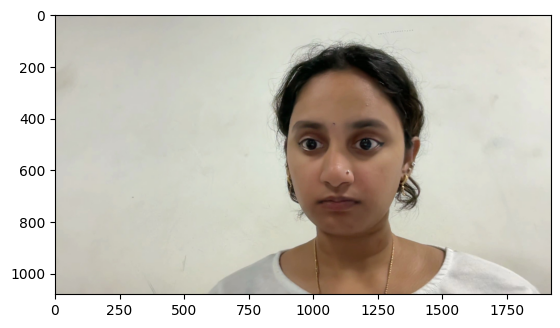

In [7]:
output_path = "data/output_webcam.mp4"
capture_video(output_path)

#extract a single frame from the video
def extract_frame(video_path, frame_number, output_path):
    video = cv2.VideoCapture(video_path)
    video.set(1, frame_number)
    ret, frame = video.read()
    cv2.imwrite(output_path, frame)
    video.release()

#call the function
video_path = "data/output_webcam.mp4"
frame_number = 20
output_path = "data/frame.jpg"
extract_frame(video_path, frame_number, output_path)

#cpnvert from BGR to RGB

plt.imshow(cv2.cvtColor(cv2.imread(output_path), cv2.COLOR_BGR2RGB))

3.Chroma Keying: Read about the technique of chroma keying. Following are a few good starting points: • Introduction: http://en.wikipedia.org/wiki/Chroma key
• Alvy Ray Smith and James F Blinn, ”Blue Screen Matting”, SIGGRAPH’96.
Create an interesting composite of two videos using this technique, possibly with one video including yourselves.

In [12]:

def simple_chroma_keying(video_path, template_path, output_path):
    
    video = cv2.VideoCapture(video_path)
    template = cv2.VideoCapture(template_path)    
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    fps = 30
    out = cv2.VideoWriter(output_path, fourcc, fps, (640, 480))    
    
    while True:
        ret_video, frame_video = video.read()
        ret_template, frame_template = template.read()

        
        if not ret_video or not ret_template:
            break

        frame_video_hsv = cv2.cvtColor(frame_video, cv2.COLOR_BGR2HSV)
        frame_template_hsv = cv2.cvtColor(frame_template, cv2.COLOR_BGR2HSV)   
            
        lower_green = np.array([20, 0, 0])
        upper_green = np.array([80, 255, 255])            
        mask = cv2.inRange(frame_template_hsv, lower_green, upper_green)        
        res = cv2.bitwise_and(frame_template_hsv, frame_template_hsv, mask=np.invert(mask) )        
        res = cv2.cvtColor(res, cv2.COLOR_HSV2BGR)    
        #ensure that they are of same size
        frame_video = cv2.resize(frame_video, (640, 480))
        res = cv2.resize(res, (640, 480))
        


        frame_template = cv2.add(res, frame_video)
              
       

        #cv2.imshow("frame", frame_template)        
        out.write(frame_template)        
       
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    
    video.release()
    template.release()
    out.release()
    #cv2.destroyAllWindows()

In [13]:

video_path = "data/output_webcam.mp4"
template_path = "data/meme.mp4"
output_path = "data/output_chroma_keying.mp4"

simple_chroma_keying(video_path, template_path, output_path)



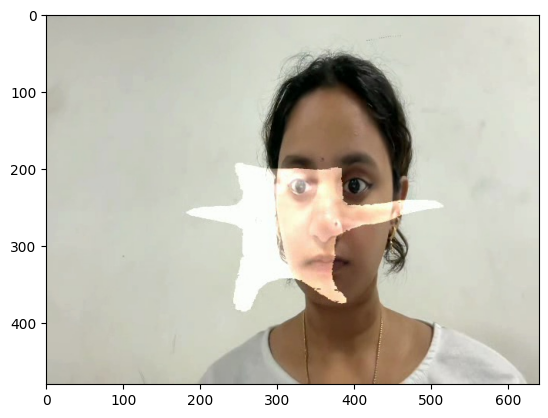

In [14]:
#call the extract frame function
video_path = "data/output_chroma_keying.mp4"
frame_number = 20
output_path = "data/frame_chroma.jpg"
extract_frame(video_path, frame_number, output_path)

#cpnvert from BGR to RGB

plt.imshow(cv2.cvtColor(cv2.imread(output_path), cv2.COLOR_BGR2RGB))


Report:

2.1 Problem assigned:  To extract frames from a video and to perform the reverse task of stitching the images to form a video, while controlling the frame rate. 

Challenges:

1. Finding a suitable video format:  
2. python 3.12 is not compatible with the video capturing functions(at the very least in macOS), frames keep collapsing and the video frames don't get stored properly.
3. the frame rate while stitching back the video from the images should be sensible.

Learning Outcome:

.mp4 works best for the whole process or video to image and image to video conversion, it causes the least amount of inconsistency

2.2 Problem assigned: To capture video from webcam and save it. 

Challenges:

1. Permission issues
2. settinmg up the frame resolution 
3. displaying the frame causes the kernel to crash in some versions of OpenCV

Learning Outcome:

Always have the latest version of OpenCV installed for getting proper use of the in built functions.

2.3 Chroma Keying:

Challenges:

1. Extremely tricky to perform in the RGB space, HSV space works best
2. Size inconsistency caused issues
3. Properly removing the background got tricky in videos where there was green pigment present. Calliberating to find the optimal green values for thresholding also proved to be pivotal for recomposition.

Learning:

The primary principle behind chroma keying is the removal of a specific color value, typically a brightly colored backdrop such as green or blue, from the original media. This color is chosen for its contrast to human skin tones and the absence of its hue in clothing or props, which makes it easier to isolate. Green and blue are the most commonly used colors for chroma key due to their distinctiveness from human skin tones and their prevalence in digital video formats that store more data for green channels, offering finer control and less noise. 

The contrast with the green screen helped extract the subject decently and aided in the creation of the collage. 





